# MELTS geobarometry part 3 - multi-phase saturation in mafic magmas

- The rhyoliteMELTS geobarometer first used by Gualda and Ghiorso (2014), which focused on the quartz - 2-feldspar ternary, has been expanded to consider the co-saturation of other phases. One of the primary applications of this method outside of high-silica rhyolites is the co-saturation of plagioclase and pyroxene(s) in felsic and intermediate magmas (Harmon et al. 2018).
- In this notebook we use an experimental composition from Moore and Carmichael (1998) to evaluate the performance of the plagioclase-pyroxene(s) barometry method.

**Before any calculations can be run** users need to download the alphaMELTS for MATLAB files (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/) and store them locally on their computer. These files then need to be added to the Python path by using the $sys.path.append()$ command below.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

import pyMELTScalc as M
sys.path.append(r'MELTS')

M.__version__

'0.1.27dev'

In [3]:
# used to suppress MELTS outputs in MacOS systems (run twice)
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

To demonstrate how pyMELTScalc can be used to estimate the pressure of storage for any magma saturated in multiple solid phases we'll use the compsition of an orthopyroxene, clinopyroxene, and plagioclase saturated melt from experiment Y0206-1 of Neave et al. (2019).

In [2]:
bulk = {'SiO2_Liq': 48.82,
       'TiO2_Liq': 1.45,
       'Al2O3_Liq': 13.46,
       'FeOt_Liq': 12.79,
       'MgO_Liq': 7.32,
       'CaO_Liq': 11.84,
       'Na2O_Liq':1.87,
       'K2O_Liq': 0.17,
       'H2O_Liq': 0.2}

Before we run the barometry calculations there are several other things that need to be specified:
- The oxygen fugacity of the system, reported to be NNO +1.1.
- The pressure range and number of steps.
- The phases of interest.
- The thermodynamic model we want to use for the calculations.


In [3]:
fO2_offset = 1.1 # offset from NNO buffer
P_bar = np.linspace(250,7500,38) #bars
phases = ['olivine1', 'clinopyroxene1', 'plagioclase1']
Model = "MELTSv1.0.2" # calculations performed using the rhyolite-MELTS v1.0.2 thermodynamic model as in Harmon et al. (2018)

Now we can use these parameters to calculate pressure. Note, with a natural glass data the H$_2$O content and oxygen fugacity may not be known, which leads to additional uncertainty in the calculation as these parameters have a notable influence on the saturation curves investigated here.

Notably, in the example below we'll also specify a maximum temperaure interval on 200 degrees Celsius below the liquidus and a temperature step for each calculatio of 1 degree Celsius.

In [4]:
Results_v102 = M.find_mineral_cosaturation(bulk = bulk, 
                                   Model = Model,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1150,
                                   fO2_buffer = "NNO",
                                   dt_C = 1, # temperature interval for each calculation
                                   T_maxdrop_C = 200) # maximum temperature below the liquidus the code will search for 3 phase saturation
                                    

To investigate the results, we can use in-built plotting functions to look at the position of the saturation curves in P-T space:

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


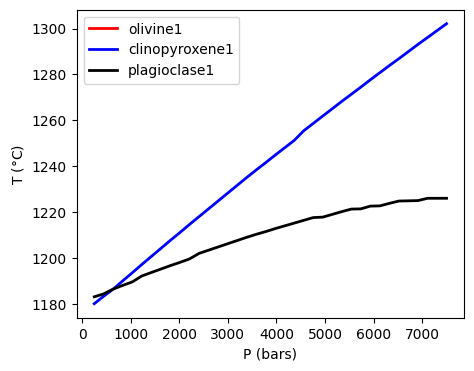

In [5]:
M.plot_surfaces(Results = Results_v102, P_bar = P_bar, phases = phases)

We can also investigate the temperature residual between the curves using the plottin function below.

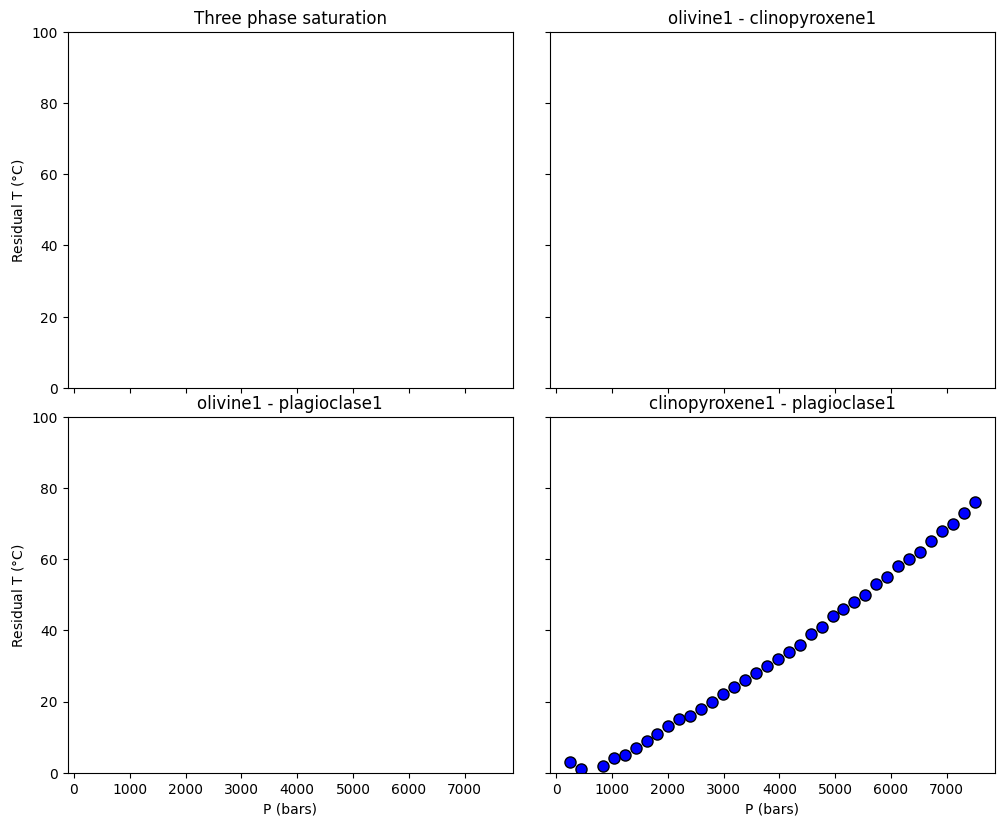

In [6]:
M.residualT_plot(Results = Results_v102, P_bar = P_bar, phases = phases, interpolate = False, ylim = [0, 100])

These results suggest that the magma likely equilibrated around 900 - 1400 bars (90-100 MPa), with the plagioclase-clinopyroxene intersection indicating a slightly higher pressure of equilibrium than the 3-phase and plagioclase-orthopyroxene intersections. Interestingly, these results aline well with the experimental pressure of 1008 bars (100.8 MPa). However, if we were to follow the "Which MELTS verison should you use?" flow-diagram on the ofm-research website (https://melts.ofm-research.org/MELTS-decision-tree.html), you'll see that we should have used rhyolite-MELTS v1.2.0 as the magma contains dissolved H$_2$O. As a result, we can rerun the calculations, keeping everything the same but using the rhyolite-MELTS v1.2.0 model instead.

In [7]:
Model = "pMELTS"
Results_v120 = M.find_mineral_cosaturation(bulk = bulk, 
                                   Model = Model,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1150,
                                   fO2_buffer = "NNO",
                                   dt_C = 1, # temperature interval for each calculation
                                   T_maxdrop_C = 200) # maximum temperature below the liquidus the code will search for 3 phase saturation
                                    

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

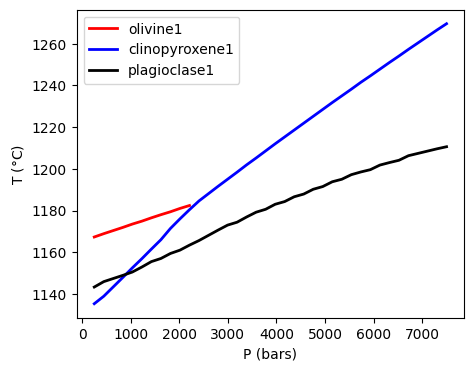

In [8]:
M.plot_surfaces(Results = Results_v120, P_bar = P_bar, phases = phases)

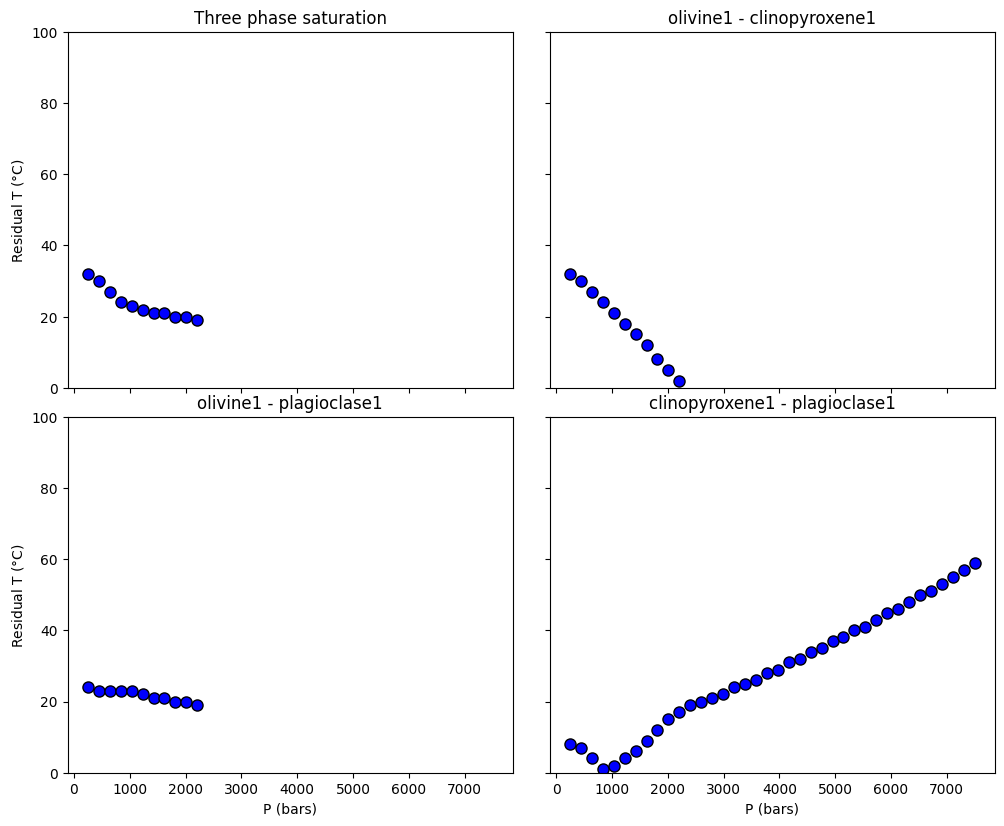

In [9]:
M.residualT_plot(Results = Results_v120, P_bar = P_bar, phases = phases, interpolate = False, ylim = [0, 100])

In [5]:
Model = "Holland"
bulk = {'SiO2_Liq': 48.82,
       'TiO2_Liq': 1.45,
       'Al2O3_Liq': 13.46,
       'FeOt_Liq': 12.79,
       'MgO_Liq': 7.32,
       'CaO_Liq': 11.84,
       'Na2O_Liq':1.87,
       'K2O_Liq': 0.17,
       'Cr2O3_Liq': 0.02,
       'H2O_Liq': 0.1,
       'Fe3Fet_Liq': 0.18}

phases =["ol", "cpx", "pl4T"]
P_bar = np.linspace(500.0, 7500.0, 16)

Results_Holland = M.find_mineral_cosaturation(bulk = bulk, 
                                           cores = 4,
                                           Model = Model,
                                           phases = phases,
                                           P_bar = P_bar, 
                                           T_initial_C = 1150,
                                           dt_C = 1, # temperature interval for each calculation
                                           T_maxdrop_C = 75)

Using libMAGEMin.dylib from MAGEMin_jll
Using libMAGEMin.dylib from MAGEMin_jll
Using libMAGEMin.dylib from MAGEMin_jll
Using libMAGEMin.dylib from MAGEMin_jll
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On entry to DGETRS, parameter number  5 had an illegal value
** On entry to DGETRF, parameter number  4 had an illegal value
** On en

In [8]:
Results_Holland

{'spl': array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan]]]),
 'cpx': array([[[1123.5, 1128.4, 1136.4, 1140.6, 1147.5, 1149.9, 1154.9, 1160. ,
          1165.5, 1170.8, 1175.8, 1180.1, 1187.7, 1193.5, 1199. , 1204. ]]]),
 'pl4T': array([[[1165.5, 1172.4, 1173.4, 1170.6, 1173.5, 1171.9, 1174.9, 1175. ,
          1182.5, 1179.8, 1185.8, 1184.1, 1186.7, 1188.5, 1193. , 1195. ]]]),
 'T_Liq': array([[[1166.5, 1172.4, 1173.4, 1171.6, 1174.5, 1171.9, 1175.9, 1176. ,
          1184.5, 1179.8, 1185.8, 1190.1, 1189.7, 1194.5, 1199. , 1204. ]]]),
 'H2O_melt': array([[[0.0054229 , 0.00565551, 0.00554157, 0.00525772, 0.00495895,
          0.00515593, 0.00518773, 0.00528527, 0.00519504, 0.0051875 ,
          0.00484723, 0.00514483, 0.0053954 , 0.00541099, 0.00556777,
          0.00524674]]]),
 '3 Phase Saturation': array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan]]]),
 'spl - cpx': array([[[nan, nan, na

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

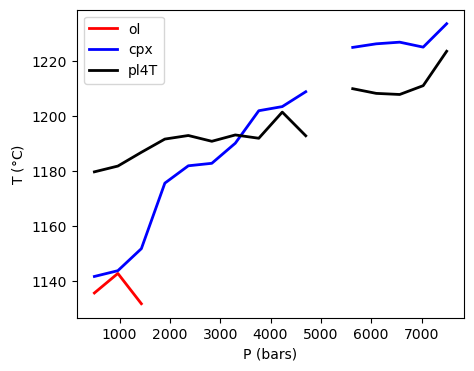

In [6]:
M.plot_surfaces(Results = Results_Holland, P_bar = P_bar, phases = phases)

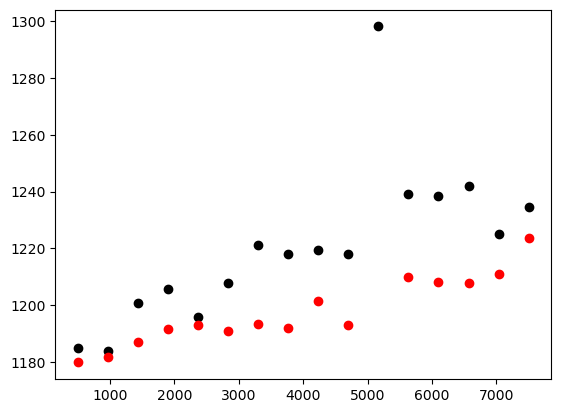

In [7]:
f, a = plt.subplots(1,1)
a.plot(P_bar, Results_Holland['T_Liq'][0,0,:], 'ok')
a.plot(P_bar, Results_Holland['pl4T'][0,0,:], 'or')